# SATELLITE IMAGE CLASSIFICATION

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from skimage.transform import resize
from glob import glob
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
from tensorflow.keras import Sequential, layers, applications
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Image Path

In [4]:
cloudy = glob('cloudy/*.jpg')
desert = glob('desert/*.jpg')
green_area = glob('green_area/*.jpg')
water = glob('water/*.jpg')

In [5]:
len(cloudy)

1004

In [6]:
len(desert)

1131

In [7]:
len(green_area)

988

In [8]:
len(water)

940

### Define Classes

In [10]:
classes = {0: 'cloudy', 1: 'desert' , 2: 'green_area' , 3: 'water'}

### Load and Label Images

In [11]:
images =[]
labels =[]

for i in cloudy:
    img = plt.imread(i)
    images.append(img)
    labels.append(0)

for i in desert:
    img = plt.imread(i)
    images.append(img)
    labels.append(1)

for i in green_area:
    img = plt.imread(i)
    images.append(img)
    labels.append(2)

for i in water:
    img = plt.imread(i)
    images.append(img)
    labels.append(3)

### Plot Images

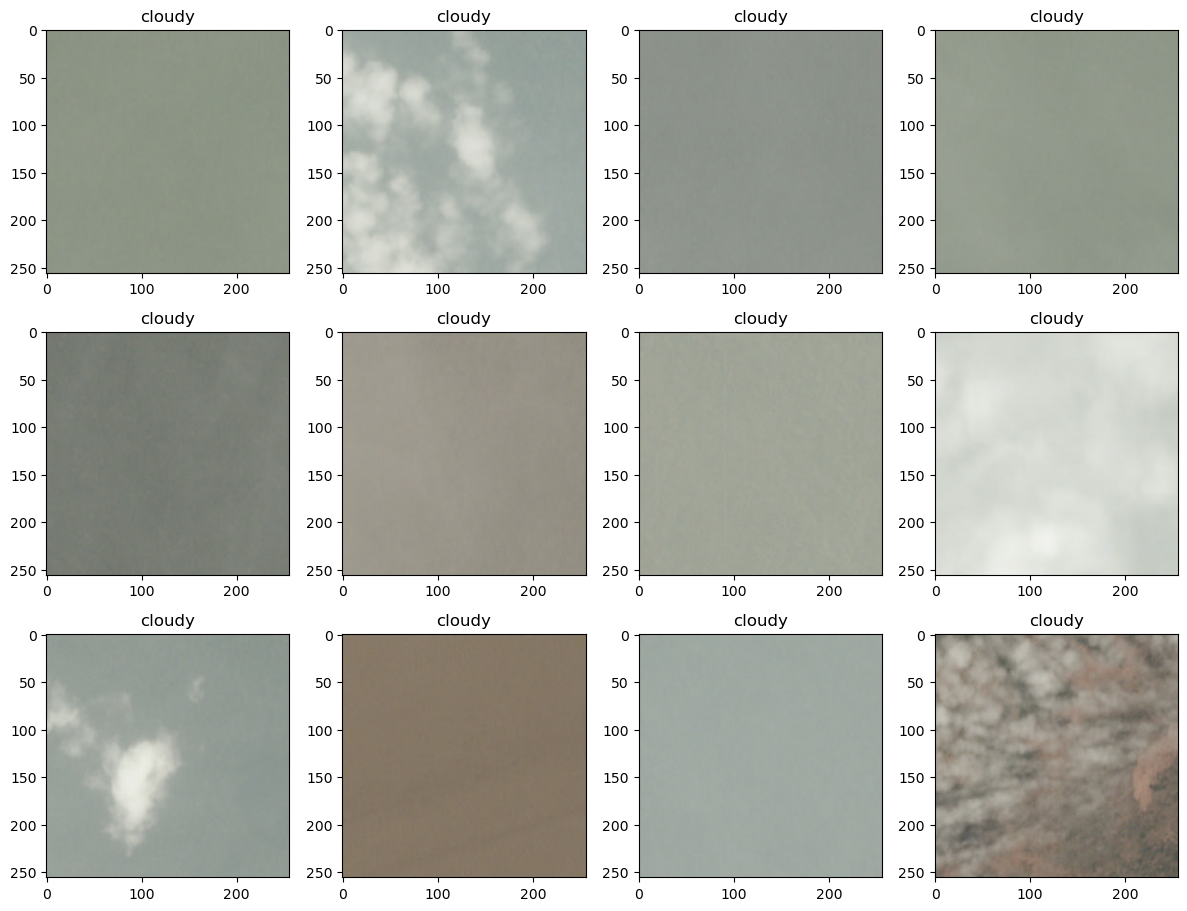

In [12]:
plt.figure(figsize=(12,12))
for i in range(12):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i],cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

### Shuffle Images

In [14]:
images,labels = shuffle(images,labels)

### Plot Images

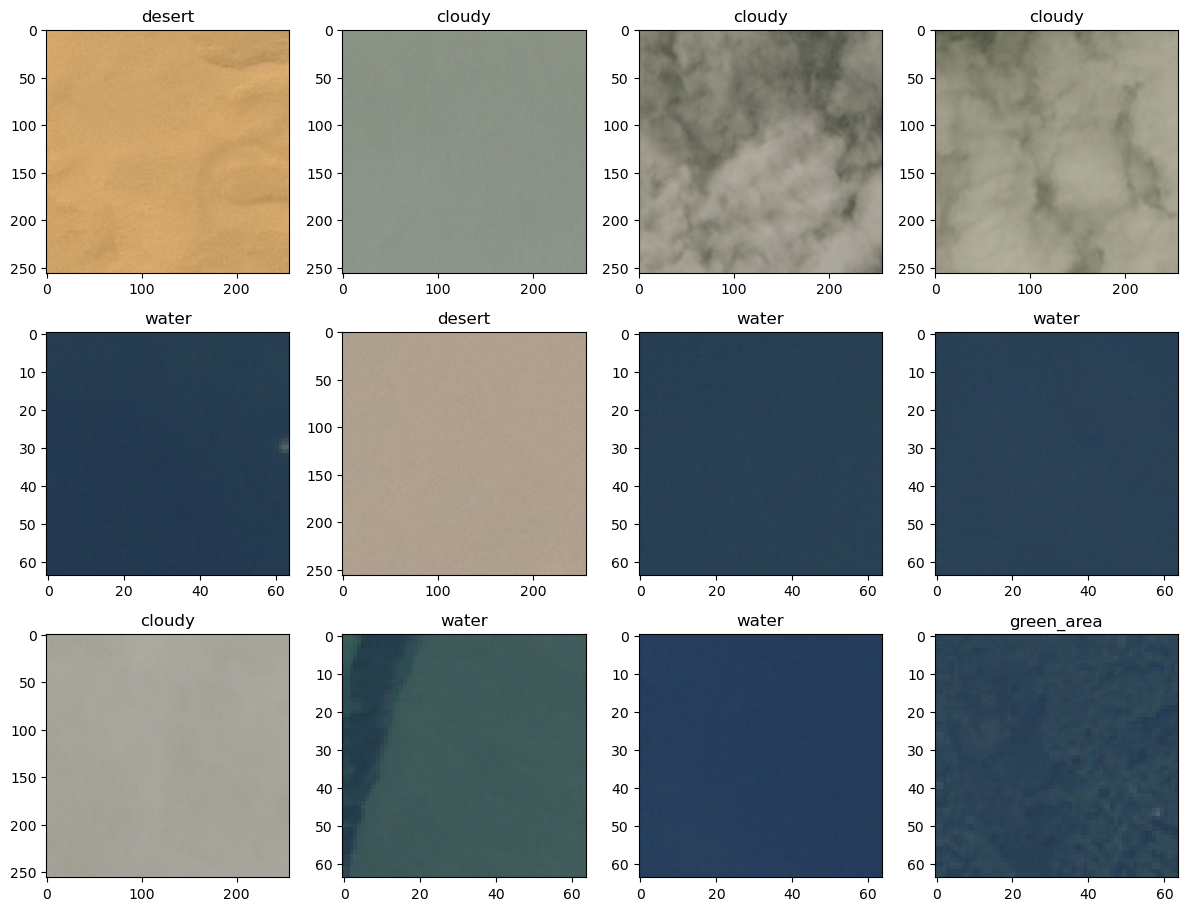

In [15]:
plt.figure(figsize=(12,12))
for i in range(12):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i],cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

### Resize Images to MobileNetV2 Input Shape (224,224,3)

In [16]:
 X = []

for i in images:
    X.append(resize(i, (224,224,3)))

### Plot Images After resizing Images

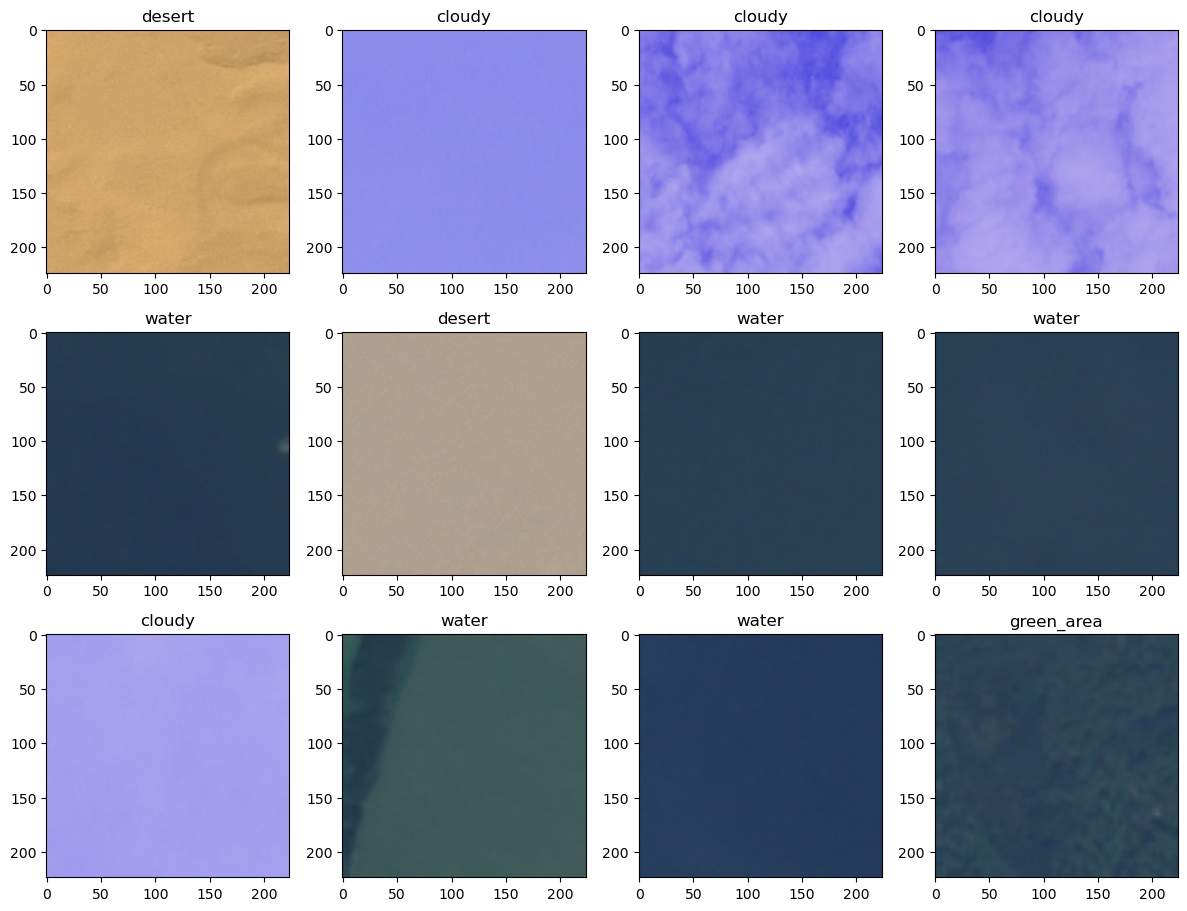

In [17]:
plt.figure(figsize=(12,12))
for i in range(12):
    plt.subplot(4,4,i+1)
    plt.imshow(X[i],cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

### Convert image and label datatypes from list to Numpy array

In [18]:
X = np.array(X)
y = np.array(labels)

### Covert Images and Labels to Numpy arrays

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

### MobileNetV2 Pre-trained Feature Extractor Model URL

###### "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"


In [20]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

### Load Pre-trained MobileNetV2 Feature Extractor Model

In [21]:
hub.load(feature_extractor_model)

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x2577f73c650>

### Instantiate MobileNetV2 without Top Layer as Feature Extractor

In [22]:
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape = (224,224,3), trainable = False
)

In [24]:
y_test

array([0, 3, 3, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 1, 1, 3, 1, 0, 0, 0, 0,
       1, 2, 1, 0, 1, 3, 2, 2, 1, 3, 0, 1, 3, 3, 2, 2, 1, 0, 0, 2, 2, 2,
       2, 1, 1, 1, 2, 3, 1, 1, 1, 0, 1, 3, 2, 1, 0, 1, 0, 0, 1, 0, 2, 1,
       2, 1, 3, 3, 2, 1, 3, 2, 0, 1, 3, 3, 1, 3, 0, 0, 1, 2, 3, 0, 3, 0,
       2, 2, 2, 1, 1, 3, 0, 1, 0, 0, 2, 3, 0, 2, 0, 3, 3, 2, 1, 1, 2, 0,
       1, 2, 0, 0, 1, 2, 0, 0, 3, 2, 1, 2, 1, 2, 1, 1, 0, 0, 3, 0, 3, 0,
       3, 3, 1, 0, 1, 2, 1, 3, 3, 3, 3, 0, 1, 3, 3, 2, 3, 3, 2, 2, 0, 1,
       3, 2, 1, 1, 1, 1, 0, 0, 1, 2, 0, 0, 1, 3, 3, 1, 0, 0, 1, 3, 2, 3,
       1, 3, 0, 2, 1, 3, 1, 1, 2, 2, 0, 0, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0,
       3, 0, 0, 1, 3, 2, 2, 3, 1, 3, 1, 1, 1, 1, 3, 0, 0, 0, 2, 1, 0, 3,
       0, 1, 0, 1, 1, 0, 2, 0, 1, 2, 0, 3, 3, 0, 1, 3, 3, 2, 1, 0, 3, 3,
       3, 3, 3, 3, 2, 1, 1, 3, 1, 2, 0, 3, 0, 3, 2, 0, 0, 0, 1, 2, 0, 1,
       2, 1, 0, 3, 3, 1, 2, 1, 2, 0, 3, 0, 1, 0, 0, 2, 3, 0, 0, 3, 1, 3,
       0, 0, 1, 2, 3, 1, 2, 1, 1, 1, 1, 0, 0, 3, 2,

In [25]:
np.unique(y_test)

array([0, 1, 2, 3])

### Build Transfer Learning Model using MobileNetV2 Feature Extractor

In [26]:
from tensorflow import keras
from tensorflow.keras import Sequential,layers

In [27]:
model = keras.models.Sequential([
        keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(224,224,3)),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Conv2D(32,(3,3),activation='relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Flatten(),
        keras.layers.Dense(128,activation='relu'),                    
        keras.layers.Dense(6,activation= 'softmax')
])

C:\RESHMA\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile Transfer Learning Model

In [28]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

### Train the Model

In [29]:
model.fit(X_train,y_train, epochs = 10,validation_split=0.1,batch_size=16)

Epoch 1/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 44s 222ms/step - accuracy: 0.7345 - loss: 0.8937 - val_accuracy: 0.8923 - val_loss: 0.2446
Epoch 2/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 35s 193ms/step - accuracy: 0.8851 - loss: 0.2845 - val_accuracy: 0.9323 - val_loss: 0.1649
Epoch 3/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 35s 194ms/step - accuracy: 0.9062 - loss: 0.1940 - val_accuracy: 0.9262 - val_loss: 0.2112
Epoch 4/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 36s 198ms/step - accuracy: 0.9243 - loss: 0.1790 - val_accuracy: 0.9508 - val_loss: 0.1081
Epoch 5/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 42s 232ms/step - accuracy: 0.9328 - loss: 0.1475 - val_accuracy: 0.9385 - val_loss: 0.1566
Epoch 6/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 40s 218ms/step - accuracy: 0.9223 - loss: 0.1579 - val_accuracy: 0.9569 - val_loss: 0.1179
Epoch 7/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 37s 204ms/step - accuracy: 0.9250 - loss: 0.1643 - val_accuracy: 0.9108 - val_loss: 0.2723
Epoch 8/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 37s 202ms/step - accuracy: 0.8968 - loss: 0

### Model Prediction

In [30]:
y_pred = model.predict(X_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step


In [31]:
y_pred = [np.argmax(i) for i in y_pred]

### Accuracy

In [32]:
accuracy_score(y_test,y_pred)

0.939729397293973

### Plot Confusion Matrix

<Axes: >

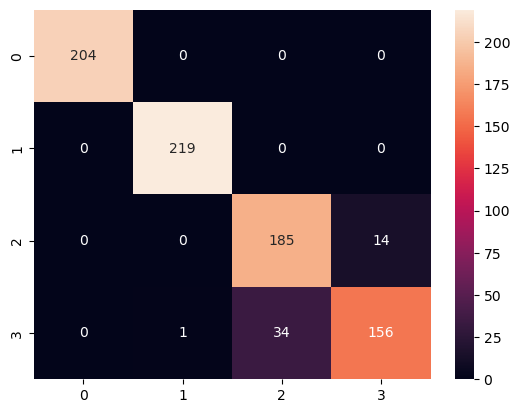

In [33]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')

### Print Classification Report

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       204
           1       1.00      1.00      1.00       219
           2       0.84      0.93      0.89       199
           3       0.92      0.82      0.86       191

    accuracy                           0.94       813
   macro avg       0.94      0.94      0.94       813
weighted avg       0.94      0.94      0.94       813



# THANK YOU# EDURE